In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

# Gradient Boosting

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.97368421052631582

In [19]:
# illustration on synthetic moon data
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=.2, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

1.0

In [20]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

probs = [x for x in gbrt.staged_predict_proba(X_grid)]


Text(0.5,0.98,'GradientBostingClassifier(max_depth=2)')

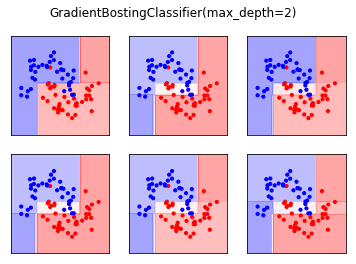

In [21]:
fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (()), 'yticks': (())})
for prob, ax in zip(probs, axes.ravel()):
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
fig.suptitle("GradientBostingClassifier(max_depth=2)")

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [.2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingClassifier(),
                    param_grid=param_grid, cv=10,
                    return_train_score=True)
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

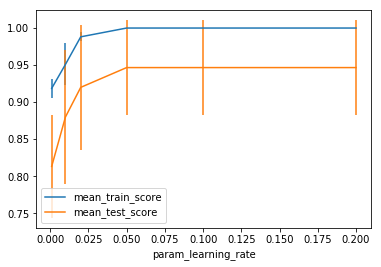

In [23]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [24]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.81944746401188617

In [28]:
param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train);

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


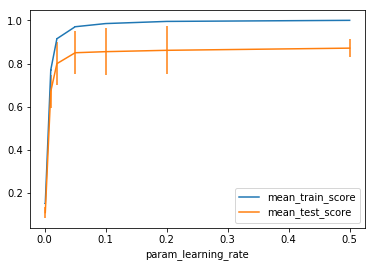

In [29]:
scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [30]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.5}, 0.87106617842921785)

In [31]:
gbrt.feature_importances_

array([ 0.075,  0.002,  0.028,  0.012,  0.088,  0.196,  0.115,  0.105,
        0.023,  0.058,  0.051,  0.064,  0.183])

In [32]:
np.argsort(gbrt.feature_importances_)[-5:]

array([ 4,  7,  6, 12,  5])

In [33]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.82145170738565676

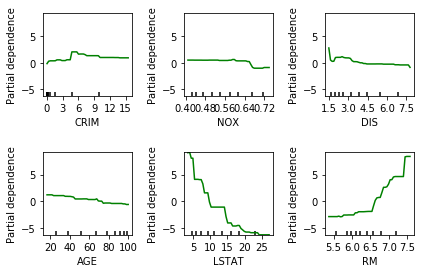

In [34]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig, axs = plot_partial_dependence(gbrt, X_train, np.argsort(gbrt.feature_importances_)[-6:],
                                       feature_names=boston.feature_names,
                                       n_jobs=3, grid_resolution=50)
plt.tight_layout()

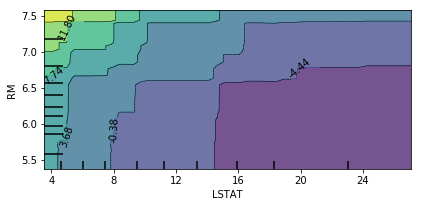

In [35]:
fig, axs = plot_partial_dependence(gbrt, X_train, [np.argsort(gbrt.feature_importances_)[-2:]],
                                   feature_names=boston.feature_names,

                                   n_jobs=3, grid_resolution=50)

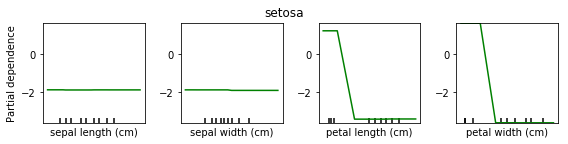

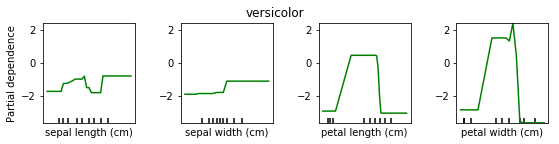

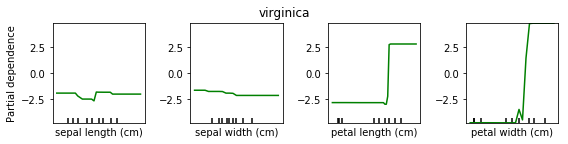

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

from sklearn.ensemble.partial_dependence import plot_partial_dependence
for i in range(3):
    fig, axs = plot_partial_dependence(gbrt, X_train, range(4), n_cols=4,
                                       feature_names=iris.feature_names, grid_resolution=50, label=i,
                                       figsize=(8, 2))
    fig.suptitle(iris.target_names[i])
    for ax in axs: ax.set_xticks(())
    for ax in axs[1:]: ax.set_ylabel("")

    plt.tight_layout()


# poor man's stacking

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(noise=.2, random_state=18)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0)),
                           ('knn', KNeighborsClassifier(n_neighbors=3))
                          ],
                         voting='soft')
voting.fit(X_train, y_train)
lr, tree, knn = voting.estimators_
print(("{:.2f} " * 4).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test), tree.score(X_test, y_test),
                             knn.score(X_test, y_test)))

0.88 0.84 0.80 1.00 


In [43]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
lr_probs, tree_probs, knn_probs =  voting.transform(X_grid)

/home/andy/checkout/scikit-learn/sklearn/ensemble/voting_classifier.py:302: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


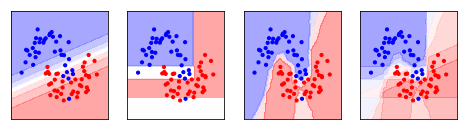

In [44]:
fig, axes = plt.subplots(1, 4, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(8, 2))
for prob, ax in zip([lr_probs, tree_probs, knn_probs, lr_probs + tree_probs + knn_probs], axes.ravel()):
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)

In [45]:
from sklearn.preprocessing import FunctionTransformer
# we need to reshape the result from votingclassifier.transform because
# of some annoyance in sklearn. We then keep only the probabilities of the positive classes!
reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1, 6)[:, 1::2], validate=False)
stacking = make_pipeline(voting, reshaper,
                         LogisticRegression(C=100))
stacking.fit(X_train, y_train)
stacking.score(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/ensemble/voting_classifier.py:302: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)
/home/andy/checkout/scikit-learn/sklearn/ensemble/voting_classifier.py:302: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


0.98666666666666669

In [46]:
stacking.score(X_test, y_test)

/home/andy/checkout/scikit-learn/sklearn/ensemble/voting_classifier.py:302: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


0.95999999999999996

In [47]:
stacking.named_steps['logisticregression'].coef_

array([[-2.625,  6.261,  9.501]])

/home/andy/checkout/scikit-learn/sklearn/ensemble/voting_classifier.py:302: DeprecationWarning: 'flatten_transform' default value will be changed to True in 0.21.To silence this warning you may explicitly set flatten_transform=False.
  DeprecationWarning)


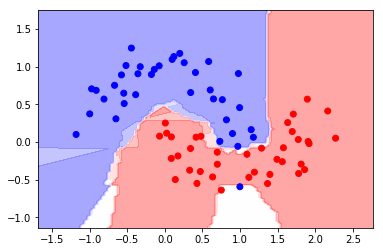

In [48]:
ax = plt.gca()
prob = stacking.predict_proba(X_grid)
ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

In [68]:
from sklearn.model_selection import cross_val_predict
first_stage = make_pipeline(voting, reshaper)
transform_cv = cross_val_predict(first_stage, X_train, y_train, cv=10, method="transform")

In [70]:
second_stage = LogisticRegression(C=100).fit(transform_cv, y_train)
print(second_stage.coef_)

[[ 2.09  -1.424  7.93 ]]


In [71]:
second_stage.score(transform_cv, y_train)

0.95999999999999996

In [73]:
second_stage.score(first_stage.transform(X_test), y_test)

1.0

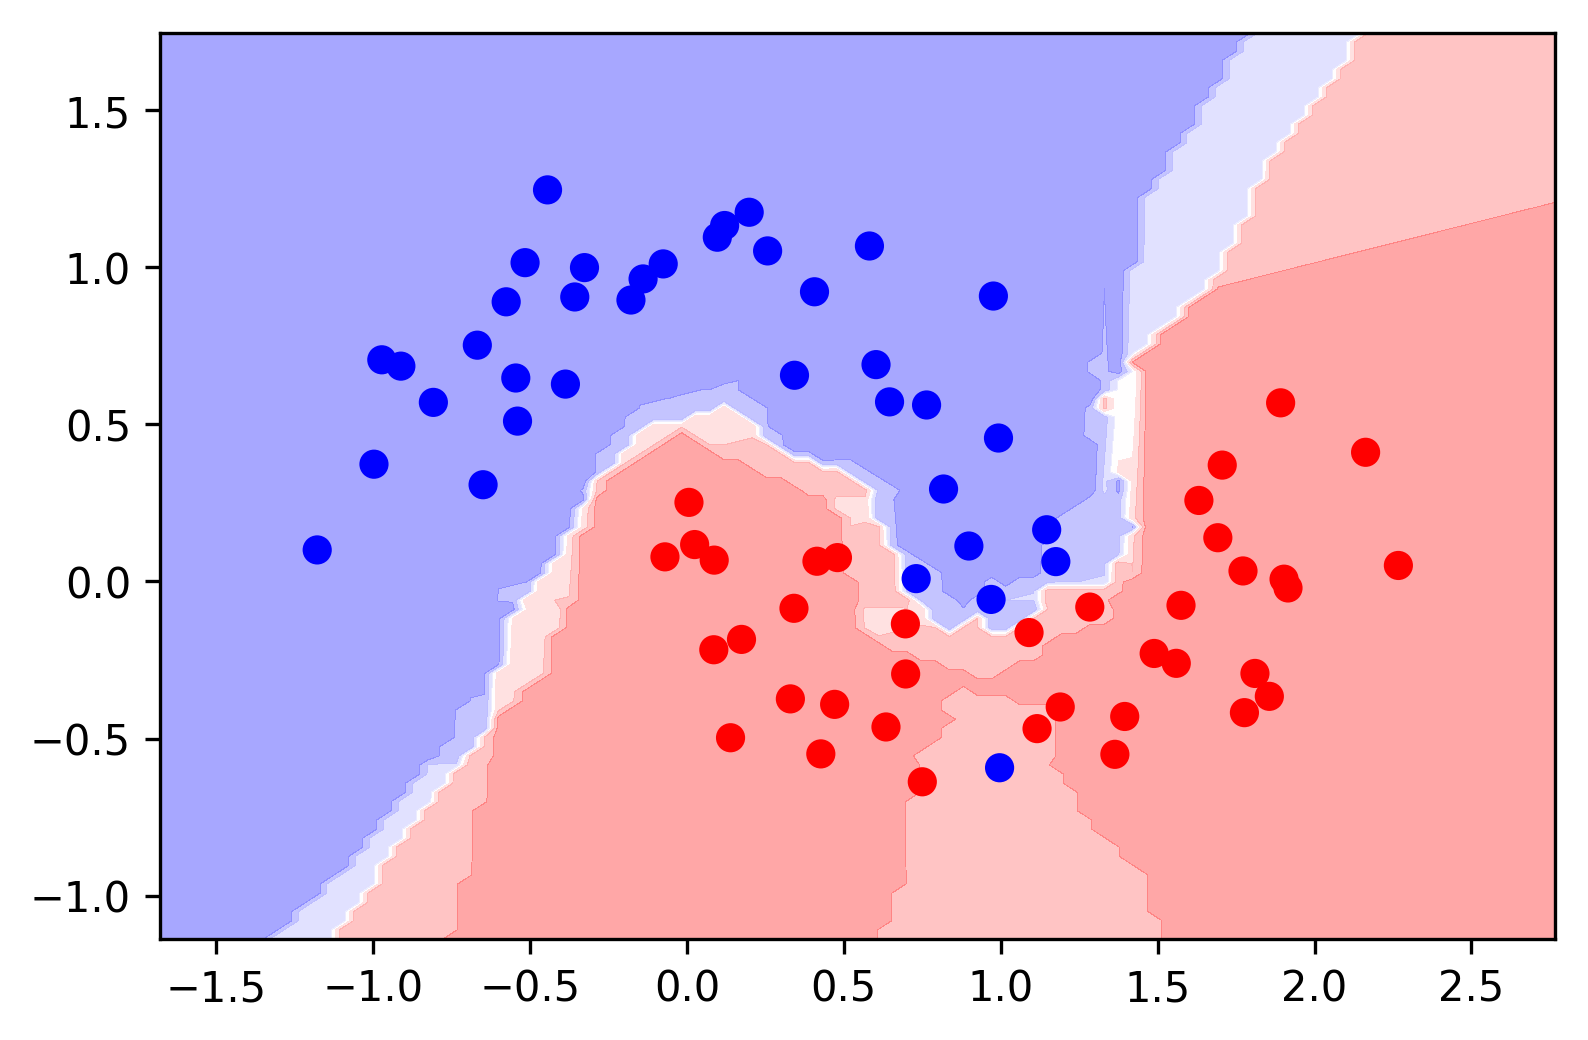

In [74]:
ax = plt.gca()
prob = second_stage.predict_proba(first_stage.transform(X_grid))
ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')